<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Metrics

_Authors:_ Tim Book, Matt Brems, Riley Dallas, Noelle Brown, Dan Wilhelm


> All models are wrong, but some are useful.
>
> -- <cite>George EP Box</cite>

Today, we'll look at metrics. A metric allows us to state precisely how well our model is performing. 

> We've already seen a metric -- the Sum of Squared Errors (SSE)!

You can consider a metric to be a distance function -- it measures how far away our predictions are from the actual targets.


### What is a metric?

A metric is a distance function! It is used to give us a numerical measure of our model's performance.

Metrics have a mathematical definition. Given some set $X$, a distance function $d$ maps any two elements $x, y \in X$ to a real number. The distance function $d$ must satisfy:
1. $d(x, y) \geq 0$.
2. $d(x, y) = 0$ if and only if $x = y$.
3. $d(x, y) = d(y, x)$.
4. $d(x, y) \leq d(x, z) + d(z, y)$, for any $z \in X$.

In this class, $x, y, z$ are usually vectors of real numbers. However, we will see examples later in the class where they can be other things, such as sets of words in an email.

---

### What is a loss function?

A loss function is often a metric. It is used along with an optimization algorithm to determine a "good" set of parameter values. Most optimization algorithms require the loss function to be differentiable.

> Be careful! In machine learning, you will see the loss function referred to variously as **cost function**, **scoring function**, **evaluation function**, **objective function**, and **entropy function**. These all refer to the same thing -- they measure how far our predictions are from the actual values.


<details><summary>QUESTION: The Sum of Squared Errors (SSE) is a metric. Assuming the predictive model is differentiable, can we use it as a loss function?
    
$$SSE = \sum_{i=1}^N{(\hat{y}(x_i) - y_i)^2}.$$</summary>

Yes! The sum of squared terms is differentiable, so it would be a good choice for optimization. In fact, SSE is a very common loss function in regression problems -- even for neural networks.
    
</details>

---

## Example -- Distance between emails as a metric

Metrics are anything that measures distance. So, they do not have to be differentiable!

For example, suppose we want to know how similar two emails are. Supposing each email is a non-empty _set_ of words (i.e. there are no duplicates), we propose the following metric:

$$d(\text{email}_1, \text{email}_2) = 1 - \frac{\text{# words in common}}{\text{# total words}}$$

This is effectively a "distance" between two sets of words! It is called the [Jaccard distance](https://en.wikipedia.org/wiki/Jaccard_index).

- $\text{email}_1 = \{\text{the, meeting, is, today}\}$.
- $\text{email}_2 = \{\text{the, prince, will, see, you}\}$.
- Then: $d(\text{email}_1, \text{email}_2) = 1 - \frac{\text{# words in common}}{\text{# total words}} = 1 - \frac{1}{8} = \frac{7}{8}$, i.e. they are far apart.


<details><summary>QUESTION: The Jaccard distance is a metric. Can we also use it as a loss function?</summary>

No -- at least not easily! It is a function, but it is definitely not differentiable.
    
</details>

In [6]:
# Can you calculate the Jaccard distance using Python?

# How similar are these users, based on their brand preferences?
user1 = {'nike', 'adidas', 'starbucks'}
user2 = {'nike', 'adidas'}

# What is the Jaccard distance between user1 and user2?
# -- Hint: Use the set intersection() and union() functions!

# 1-len(user1.intersection( user2 ))/len(user1.union(user2))                                      
1 - (len(user1.intersection(user2)))/ len(user1.union(user2))

0.33333333333333337

---

## Example -- Euclidean distance is a metric

![](./imgs/pythagoras-theorem.gif)

Let's take a look at a classic distance function -- the Euclidean distance. Don't be scared by the word _Euclidean_ -- this just indicates the geometry of the world around us!  Euclid wrote the math textbook "The Elements," the second-most widely printed book after the Bible.

> We will use a different notation from grade-school math. First, $\mathbb{R}^2$ refers to the set of all pairs of real numbers, i.e. two-dimensional points, or tuples. So, $x \in \mathbb{R}^2$ refers to a tuple $(x_1, x_2)$ and $y \in \mathbb{R}^2$ refers to a tuple $(y_1, y_2)$. 

> We write them in this way because each tuple will have millions of components later in this class. We can then easily write e.g. $(x_1, x_2, x_3, \cdots, x_{1000})$! We would quickly run out of letters if we use the grade-school notation $(x, y, z)$.

Let's start with 2-D points. Suppose we have two-dimensional points $x, y \in \mathbb{R}^2$. Using the Pythagorean Theorem, we can prove that the Euclidean distance between $x$ and $y$ is:

$$d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}.$$

By applying the Pythagorean Theorem once more, we discover a similar function for three-dimensional points $x, y \in \mathbb{R}^3$:

$$d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + (x_3 - y_3)^2}.$$

Seeing a pattern, we then define the Euclidean distance for N-dimensional points $x, y \in \mathbb{R}^N$:

$$d(x, y) := \sqrt{\sum_{i=1}^N{(x_i - y_i)^2}}.$$

<details><summary>QUESTION: What is the relationship between $d, x, y$ and Sum of Squared Errors?</summary>
    
- Let $x$ be a vector of predicted values.
- Let $y$ be a vector of actual values.
- Then, $d^2(x, y)$ is the SSE. 
    
So, the SSE is the squared distance between the two vectors!
</details>

<details><summary>QUESTION: What is the relationship between $d, x, y$ and the population variance?</summary>

- Let $x$ be any vector of real numbers, where $N = |x|$.
- Let $y$ be the mean of $x$ repeated $N$ times.
- Then, $d^2(x, y)/N$ is the variance of $x$!
</details>

In [7]:
import numpy as np

In [22]:
# Can you calculate the distance between x and y using Python?

x = (4, 18, 9, 2, 7)
y = (3, 3, 8, 1, 8)



distance = 0
for x1,y1 in zip(x,y):
    distance = distance + ((x1 - y1)**2)
    distance = distance ** .5
print(distance)
    
    
    
    
    
# TODO - Can you use a list comprehension?
sum([(xi- yi)**2 for xi, yi in zip(x,y)]) **.5

1.7991659074408035


15.132745950421556

In [23]:
# Can you calculate the distance between x and y using numpy?

x = np.array([4, 18, 9, 2, 7])
y = np.array([3, 3, 8, 1, 8])

# TODO - Can you do it in one line using vectorization?
np.sqrt(((x - y) **2).sum())

15.132745950421556

In [ ]:
from sklearn.metrics import 

# Why do metrics matter?
---

Nearly all models require use of a metric to assess our performance.
- For example: linear regression, logistic regression, and neural networks.

Many algorithms work by finding the "nearest" points.
- For example: k-Nearest Neighbors, clustering, and recommendation systems.


# How are loss functions used?
---

Over the next few weeks, we will use the same process for nearly every (parametric) model. We will choose an equation, a loss function, and an optimization algorithm.

For example, for multiple linear regression:

- Model: $\hat{y} = \beta_0 + \beta_1x_1 + \cdots + \beta_Nx_N$
- Loss Function: $SSE = \sum_{i=1}^N{(\hat{y}_i - y_i)^2}$
- "Optimization Algorithm": Linear Algebra (direct solution)

For the same model, we could have made other (less common) choices:

- Model: $\hat{y} = \beta_0 + \beta_1x_1 + \cdots + \beta_Nx_N$
- Loss Function: $E = SSE + \alpha\sum_{i=1}^N{\beta^2}$ (SSE with regularization)
- Optimization Algorithm: Gradient Descent

This same framework is even used with neural networks:
- Model: $\hat{y} = \sigma(\sigma(\frac{1}{1 + e^{-(x_1+\cdots+x_N)}} + \cdots) + \cdots)$, for a non-linear function $\sigma$.
- Loss Function: $E = SSE + \alpha\sum_{i=1}^N{\beta^2}$ (SSE with regularization)
- Optimization Algorithm: Gradient Descent

In [24]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling imports
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Load the Data
---

Today's dataset (`Advertising.csv`) is from the [ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/data.html) website.

Drop `"Unnamed: 0"` once you've loaded the CSV into a DataFrame.

In [25]:
# bring in advertising data
ads = pd.read_csv('./datasets/Advertising.csv')
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
# drop Unnamed: 0 column
ads = ads.drop(columns='Unnamed: 0')

## Data Cleaning
---

Run the following checks in the cells provided:

- Are there any null values (`NaN`)?
- Are there any corrupted columns?



In [27]:
# Check for nulls
ads.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [28]:
# Check datatypes for any corrupted columns
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

## Create our feature matrix (`X`) and target vector (`y`)
---

The following columns will be our features:

- `'TV'`
- `'radio'`
- `'newspaper'`

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [29]:
# create X and y
FEATURES = ['TV', 'radio', 'newspaper']

X = ads[FEATURES]
y = ads['sales'].values

# Verify dimensions
print('X: ', X.shape)
print('y: ', y.shape)

X:  (200, 3)
y:  (200,)


## Linear Regression model
---

In the cell below, create an instance of `LinearRegression`.

In [30]:
# instantiate
lr = LinearRegression()

## Fitting the model
---

The `.fit()` method is how our model will learn the coefficients for each of the features (`'TV'`, `'radio'` and `'newspaper'`).

Once it's fit, you can see the bias (aka intercept) and coefficients are by running:

```python
model.coef_
model.intercept_
```

In [31]:
# fit
lr.fit(X, y)

LinearRegression()

In [32]:
# coefficients
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [33]:
# y intercept
lr.intercept_

2.938889369459412

## Interpreting Slopes

In [34]:
pd.Series(lr.coef_, index=FEATURES)

TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

## Making predictions
---

To get predictions from our model, all we have to do is run `.predict(X_to_predict)`. This will return a list (`np` array) of predictions, one for each row in our `X_to_predict`. Normally you'll use this method for making predictions on unseen data, but today we'll be evaluating the data that was fed into the model during `.fit()`.

In [37]:
# get predictions from our X data
predictions = lr.predict(X)

y[:5], predictions[:5]

(array([22.1, 10.4,  9.3, 18.5, 12.9]),
 array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186]))

---

## Back to Metrics!

Now that we've computed some predictions, let's understand the rationale behind why Mean Squared Error is so commonly used as a metric and loss function.

## Sum Squared Error (SSE)
---

$$SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2$$

SSE forms the basis for several loss/optimization functions that we'll cover next:

- Mean squared error (MSE)
- Root mean squared error (RMSE)
- R2

> **NOTE:** Depending on what corner of the internet you're in, the SSE goes by many different names. Some common names are the **residual sum of squares (RSS)** and **total sum of squares (TSE)**. However, some other sources abbreviate something else RSS. Be careful!

<details><summary>QUESTION: Can you think of a reason why NOT to use this as a metric?</summary>

Its value is dependent on the number of data points! So we cannot use it to reliably compare between two datasets, e.g. our training and test sets.
    
</details>

In [38]:
# Calculate SSE by hand
sse = ((y - predictions)**2).sum()
sse

556.8252629021872

## Mean Squared Error (MSE)
---

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.
- Punishes outliers severely.
- Coincides directly with the metric used to fit OLS model.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Uninterpretable to humans

In [39]:
# MSE by hand
sse /len(y)

2.784126314510936

In [40]:
# MSE using sklearn
metrics.mean_squared_error(y, predictions)

2.784126314510936

## Root Mean Squared Error (RMSE)
---

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common.
- Represents (approximately) average distance from the predicted value.
    - Looks similar to standard deviation.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Only a _little_ interpretable.

In [42]:
# RMSE

metrics.mean_squared_error(y, predictions) ** .5

1.6685701407225697


## Mean Absolute Error (MAE)
---

$$MAE = \frac{1}{n}\sum_{i=1}^n(|y_i-\hat{y}_i|)$$

Goal: Get MAE as close to 0 as possible.

Pros: 
- Represents mean distance from the predicted value.
- In the original units of $Y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Punishes all errors with same "severity".
- Cannot be easily used as a loss function, since it is non-differentiable.

In [43]:
# Calcuate MAE by hand

np.abs(y - predictions).mean()

1.252011229687068

In [45]:
# Via sklearn.metrics

metrics.mean_absolute_error(y, predictions)

1.252011229687068

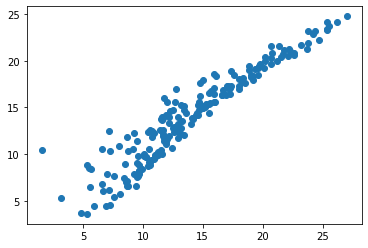

In [46]:
plt.scatter(y, predictions)

## Coefficient of Determination, $R^2$
---

$$R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}} = 1 - \frac{\text{Model Error}}{\text{Total Variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in _y_ is explained by the _x_-variables in our model."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). [Adjusted $R^2$](https://www.statisticshowto.com/adjusted-r2/) can handle this assumption better.
- **ONLY INTERPRETABLE WITH LINEAR REGRESSION!**
- Outside linear regression values outside 0 and 1 are possible.

> Are low $R^2$ scores bad?
>
> I'm glad you asked! Not everything in regression is about getting the best predictions. In some fields, such as human behavior, you would expect to achieve scores much lower then 50\%! For inference, perhaps 0.3 is enough to measure an effect! Yes, there is more to machine learning than prediction. Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [47]:
# Null prediction

null_prediction = y.mean()


In [48]:
# Null residuals
null_residuals = y - null_prediction

In [49]:
# Null sum of squares

null_ss = (null_residuals ** 2).sum()

In [50]:
# R2 by hand

1 - sse / null_ss


0.8972106381789522

In [51]:
# R2 from sklearn
metrics.r2_score(y, predictions)

0.8972106381789522

In [52]:
# R2 from model

lr.score(X, y)

0.8972106381789522